+----------+---+------+-----------+-----------+------------+----------+--------+--------------+-------+-------+-------------------+-----------------------+---------+-----------------------+--------------+------------+-----------------------+------+-----------+-------------+-------------------------------+-------------------+-------------+-------------+-------------------+-----------------+
|Patient ID|Age|   Sex|Cholesterol|Systolic_BP|Diastolic_BP|Heart Rate|Diabetes|Family History|Smoking|Obesity|Alcohol Consumption|Exercise Hours Per Week|     Diet|Previous Heart Problems|Medication Use|Stress Level|Sedentary Hours Per Day|Income|        BMI|Triglycerides|Physical Activity Days Per Week|Sleep Hours Per Day|      Country|    Continent|         Hemisphere|Heart Attack Risk|
+----------+---+------+-----------+-----------+------------+----------+--------+--------------+-------+-------+-------------------+-----------------------+---------+-----------------------+--------------+----------

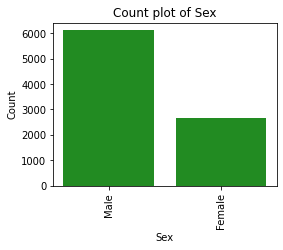

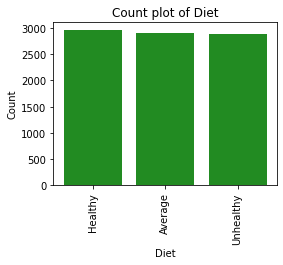

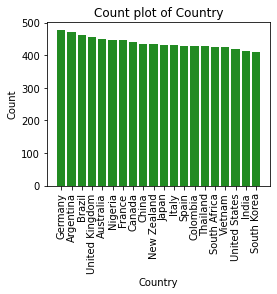

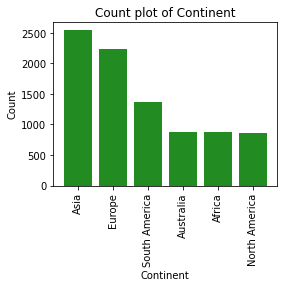

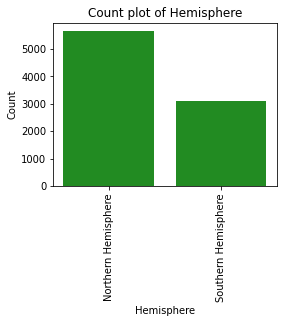

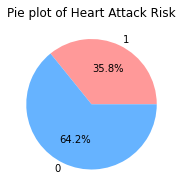

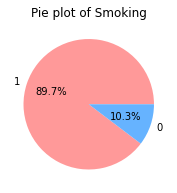

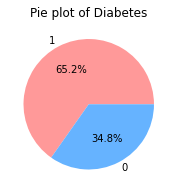

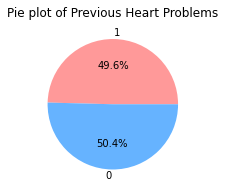

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Heart Attack Risk Prediction") \
    .getOrCreate()
df = spark.read.csv("heart_attack_prediction_dataset.csv", header=True, inferSchema=True)
from pyspark.sql.functions import col, isnan, when, count

# Displaying basic information and the first few rows of the DataFrame
df.show()
df.printSchema()

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Assuming spark session is already created as 'spark'
columns = ["Sex", "Diet", "Country", "Continent", "Hemisphere"]

for column in columns:
    # Group by the column and count occurrences
    group_data = df.groupBy(column).count()

    # Convert to Pandas DataFrame for plotting
    pandas_df = group_data.toPandas().sort_values(by='count', ascending=False)

    # Plotting using matplotlib
    plt.figure(figsize=(4, 3))
    plt.bar(pandas_df[column], pandas_df['count'], color='forestgreen')  # Changed color here
    plt.title(f"Count plot of {column}")
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
    
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Assuming spark session is already created as 'spark'
columns = ["Heart Attack Risk", "Smoking", "Diabetes", "Previous Heart Problems"]

for column in columns:
    # Group by the column and count occurrences
    group_data = df.groupBy(column).count()

    # Convert to Pandas DataFrame for plotting
    pandas_df = group_data.toPandas().set_index(column)

    # Plotting using matplotlib
    plt.figure(figsize=(4, 3))
    pandas_df['count'].plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])  # You can specify different colors for each segment
    plt.title(f"Pie plot of {column}")
    plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
    plt.show()

